In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [178]:
# Load data 
Cab_Data = trips = pd.read_csv("https://raw.githubusercontent.com/griffinpalfrey/DataSets/main/Cab_Data.csv")
City_Data = city = pd.read_csv("https://raw.githubusercontent.com/griffinpalfrey/DataSets/main/City.csv")
Customer_ID = customers = pd.read_csv("https://raw.githubusercontent.com/griffinpalfrey/DataSets/main/Customer_ID.csv")
Transaction_ID = transactions = pd.read_csv("https://raw.githubusercontent.com/griffinpalfrey/DataSets/main/Transaction_ID.csv")

In [179]:
# Information to validate Data Intake Report (file size and dedup validation)

print(len(trips))
trips_size = trips.memory_usage(deep=True).sum()
print(f"Dataset size in bytes: {trips_size}")

print(len(city))
city_size = city.memory_usage(deep=True).sum()
print(f"Dataset size in bytes: {city_size}")

print(len(customers))
customers_size = customers.memory_usage(deep=True).sum()
print(f"Dataset size in bytes: {customers_size}")

print(len(transactions))
transactions_size = transactions.memory_usage(deep=True).sum()
print(f"Dataset size in bytes: {transactions_size}")

# Dedup Validation
duplicates1 = trips[trips['Transaction ID'].duplicated()]
duplicates2 = transactions[transactions['Transaction ID'].duplicated()]

# Display duplicates
print(duplicates1)
print(duplicates2)

359392
Dataset size in bytes: 62831935
20
Dataset size in bytes: 4128
49171
Dataset size in bytes: 4224885
440098
Dataset size in bytes: 33887678
Empty DataFrame
Columns: [Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip]
Index: []
Empty DataFrame
Columns: [Transaction ID, Customer ID, Payment_Mode]
Index: []


In [180]:
# Getting a feel for the data 

# Visualising the basics of each dataframe

print(trips.head())
print(trips.isnull().sum())
print(trips.sort_values(by="City").head())
print(trips.sort_values(by="Cost of Trip", ascending=False))
print(trips.groupby("City").mean('Cost of Trip'))
print(trips.groupby("City").mean('KM Travelled'))
print(trips.groupby("Company").mean('Cost of Trip'))
print(trips.groupby("Company"))
print(trips.duplicated().sum())

   Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776  
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
        Transaction ID  Date of Travel     Company        City  KM Travelled  \
0             10000011           42377    Pink Cab  ATLANTA GA         30.45   
229653        10281058           43087  Yellow Cab

In [181]:
# Same for city dataframe

print(city.head())
print(city.isnull().sum())
print(city.sort_values(by="City").head())
print(city.sort_values(by="Population", ascending=False))
print(city.sort_values(by="Users", ascending=False))
print(city.groupby("City").mean('Population'))
print(city.groupby("City").mean('Users'))
print(city.duplicated().sum())

             City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247 
City          0
Population    0
Users         0
dtype: int64
          City   Population      Users
9   ATLANTA GA     814,885     24,701 
11   AUSTIN TX     698,371     14,978 
19   BOSTON MA     248,968     80,021 
1   CHICAGO IL   1,955,130    164,468 
8    DALLAS TX     942,908     22,157 
                City   Population      Users
6       SAN DIEGO CA     959,307     69,995 
7         PHOENIX AZ     943,999      6,133 
8          DALLAS TX     942,908     22,157 
9         ATLANTA GA     814,885     24,701 
0        NEW YORK NY   8,405,837    302,149 
10         DENVER CO     754,233     12,421 
11         AUSTIN TX     698,371     14,978 
12        SEATTLE WA     671,238     25,063 
13         TUCSON AZ     631,442      5,712 
14 

In [182]:
# Same for customers dataframe

print(customers.head())
print(customers.isnull().sum())
print(customers.sort_values(by="Customer ID").head())
print(customers.sort_values(by="Age", ascending=False))
print(customers.sort_values(by="Income (USD/Month)", ascending=False))
print(customers.groupby("Age").mean('Income (USD/Month)'))
print(customers.duplicated().sum())

   Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
       Customer ID  Gender  Age  Income (USD/Month)
7098             1    Male   36               16359
8267             2    Male   31               12069
9331             3  Female   27               12968
3511             4    Male   33               13803
10897            5    Male   24                9965
       Customer ID  Gender  Age  Income (USD/Month)
40684        41239  Female   65               17239
36083        10722    Male   65               21628
43453        46633  Female   65               19684
20425         4081  Female   65               12006
16633        53143  Female   65      

In [183]:
# Same for transactions dataframe

print(transactions.head())
print(transactions.isnull().sum())
print(transactions.sort_values(by="Transaction ID").head())
print(transactions.groupby("Transaction ID").mean('Price Charged'))
print(transactions.groupby("Transaction ID").mean('Cost of Trip'))
print(transactions.duplicated().sum())

   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64
   Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card
                Customer ID
Transaction ID             
10000011            29290.0
10000012            27703.0
10000013            28712.0
10000014            28020.0
10000015            27182.0
...                     ...
10440104            53286.0
10440105            52265.0
10440106            52175.0
10440107            52917.0
10440108            51587.0

[440098 rows x 1 columns]
        

In [184]:
# Data Cleaning
trips['Date of Travel'] = pd.to_datetime(trips['Date of Travel'], origin='1899-12-30', unit='D')
city['Population'] = city['Population'].str.replace(',','').astype(int)
city['Users'] = city['Users'].str.replace(',','').astype(int)
customers['Income (USD)'] = customers['Income (USD/Month)'].astype(float)

In [185]:
# Separate categorical and numerical values

numerical_vars_trips = ['Transaction ID', 'Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip']
categorical_vars_trips = ['Company', 'City']

numerical_vars_city = ['Population', 'Users']
categorical_vars_city = ['City']

numerical_vars_customers = ['Customer ID', 'Age', 'Income (USD/Month)']
categorical_vars_customers = ['Gender']

numerical_vars_transactions = ['Transaction ID']
categorical_vars_transactions = ['Payment_Mode']



numerical_vars = [numerical_vars_trips, numerical_vars_city, numerical_vars_customers, numerical_vars_transactions]
categorical_vars = [categorical_vars_trips, categorical_vars_city, categorical_vars_customers, categorical_vars_transactions]

print("Numerical variables are ", numerical_vars)
print("Categorical variables are ", categorical_vars)




Numerical variables are  [['Transaction ID', 'Date of Travel', 'KM Travelled', 'Price Charged', 'Cost of Trip'], ['Population', 'Users'], ['Customer ID', 'Age', 'Income (USD/Month)'], ['Transaction ID']]
Categorical variables are  [['Company', 'City'], ['City'], ['Gender'], ['Payment_Mode']]


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


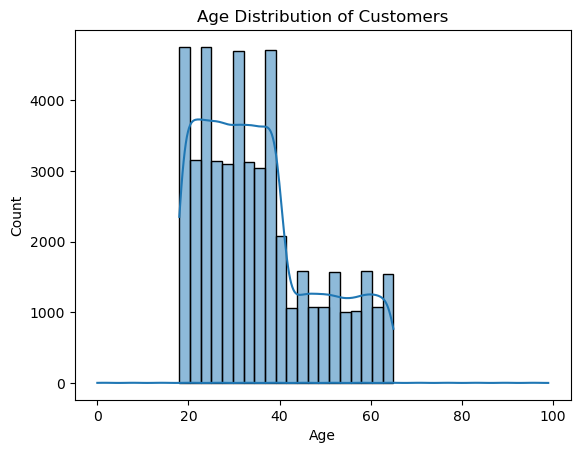

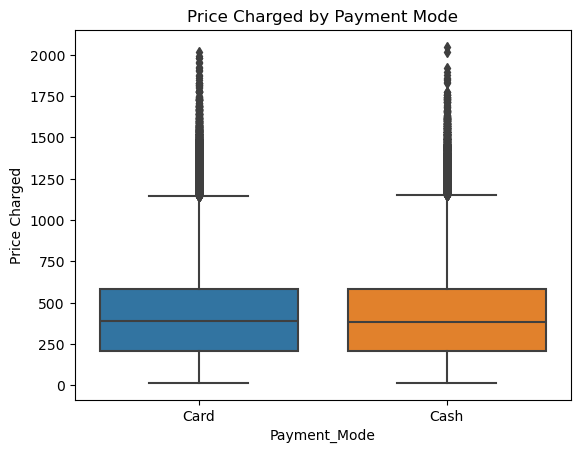

In [186]:
# Basic Data visualization before starting EDA

sns.histplot(customers['Age'], bins = 20, kde=True)
plt.title('Age Distribution of Customers')
x = np.arange(0, 100)
y = np.sin(x)
plt.plot(x, y)
plt.show()


sns.boxplot(x='Payment_Mode', y='Price Charged', data=transactions.merge(trips, on='Transaction ID'))
plt.title('Price Charged by Payment Mode')
plt.show()

In [187]:
# Start Exploratory Data Analysis. Before delving into the data, we can provide a statistic summary of all 4 dataframes.

print(trips.describe())
print(city.describe())
print(customers.describe())
print(transactions.describe())

       Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip  
count  359392.000000  359392.000000  
mean      423.443311     286.190113  
min        15.600000      19.000000  
25%       206.437500     151.200000  
50%       386.360000     282.480000  
75%       583.660000     413.683200  
max      2048.030000     691.200000  
std       274.378911     157.993661  
         Populatio

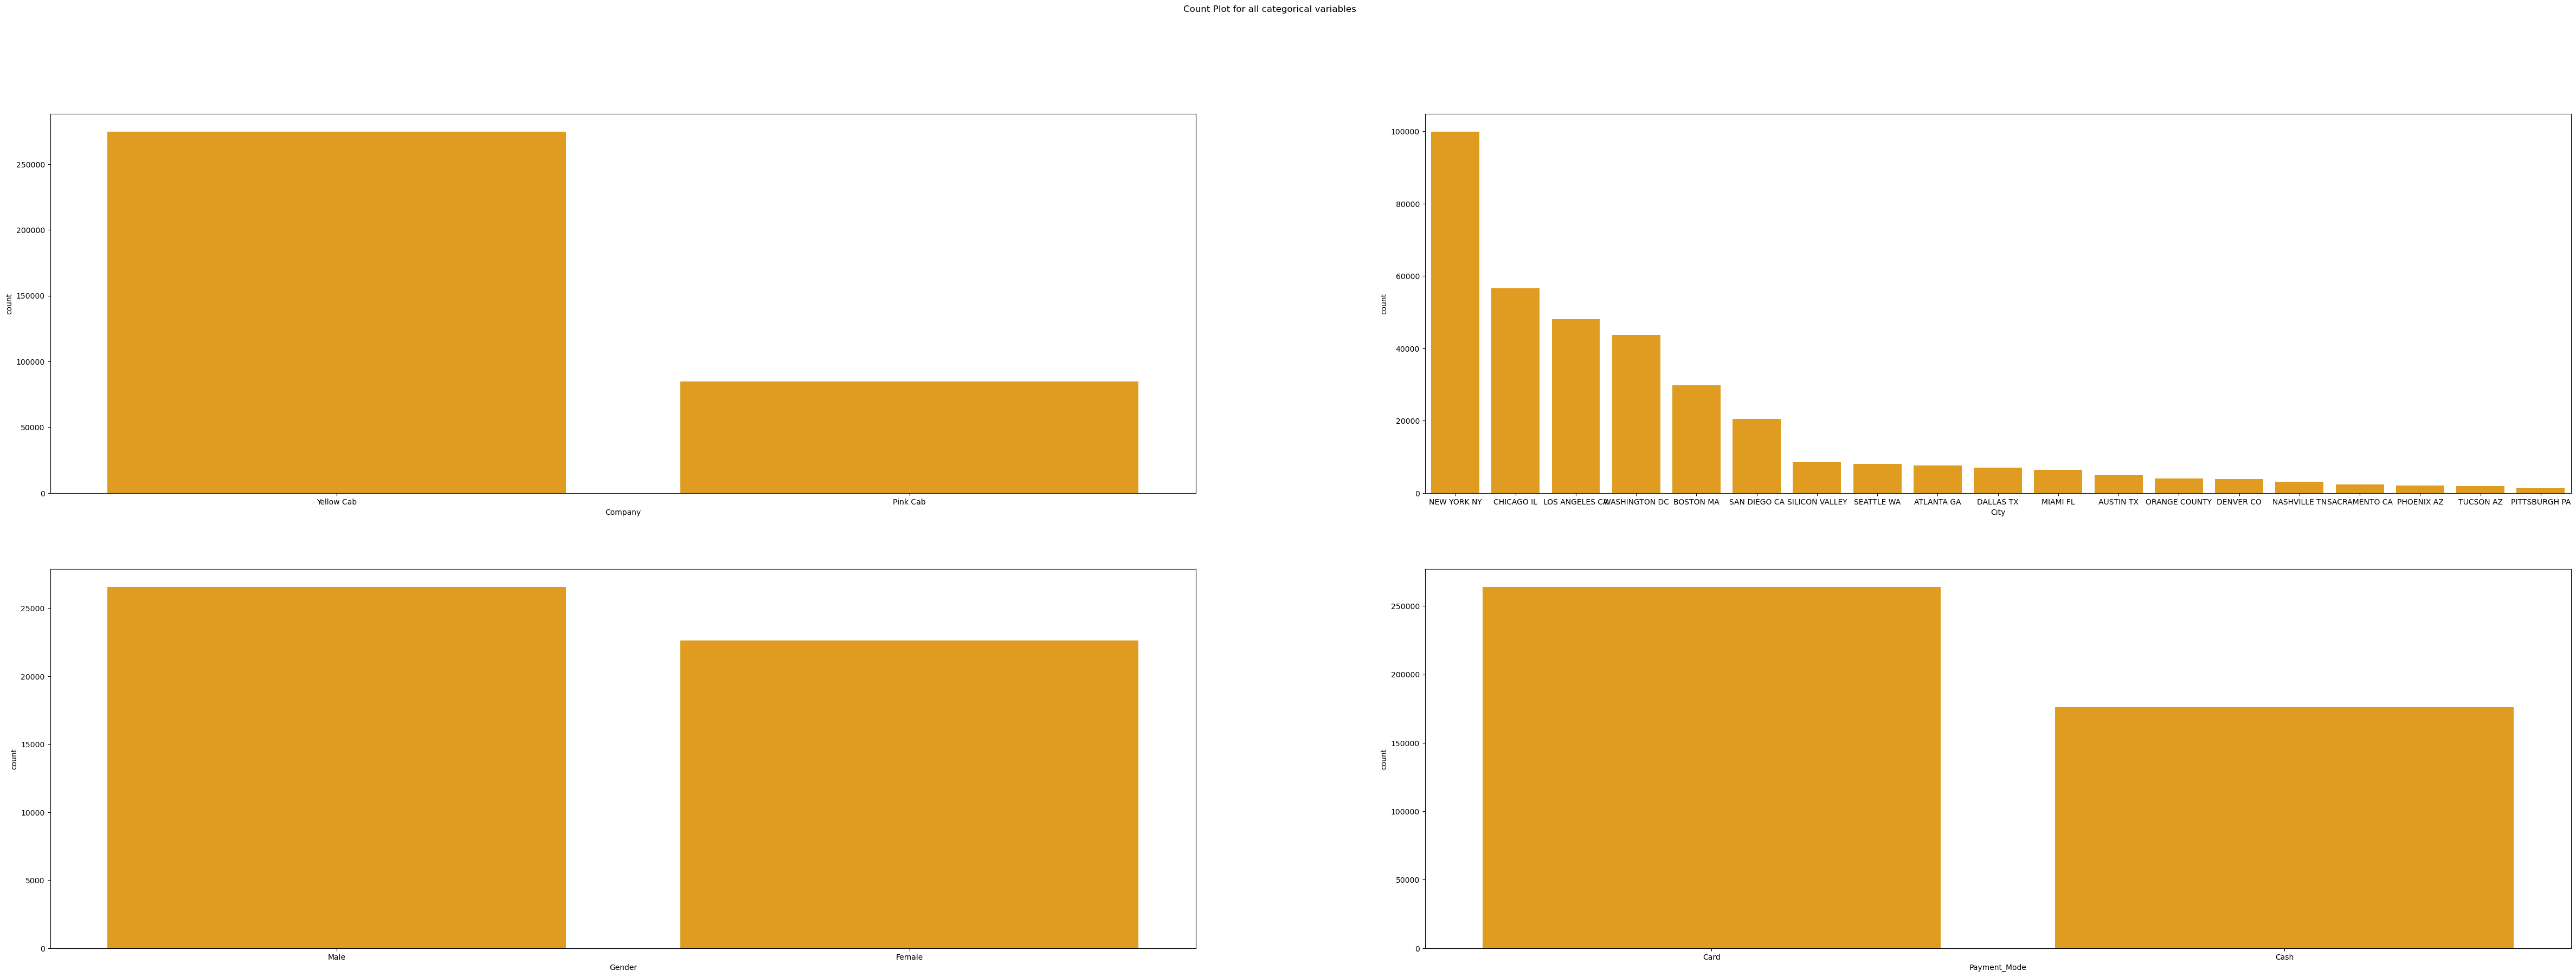

In [188]:
# We can start with Univariate Analysis: looking at one variable at a time

# Lets make a count plot for all categorical variables. 


fig, axes = plt.subplots(2,2, figsize = (60,20))
fig.suptitle('Count Plot for all categorical variables')
sns.countplot(ax = axes[0,0], x ='Company', data=trips, color='orange', order=trips['Company'].value_counts().index);
sns.countplot(ax=axes[0,1], x='City', data=trips, color='orange', order=trips['City'].value_counts().index);
sns.countplot(ax=axes[1,0], x='Gender', data=customers, color='orange', order=customers['Gender'].value_counts().index);
sns.countplot(ax=axes[1,1], x='Payment_Mode',data=transactions, color='orange',order=transactions['Payment_Mode'].value_counts().index);
plt.show()

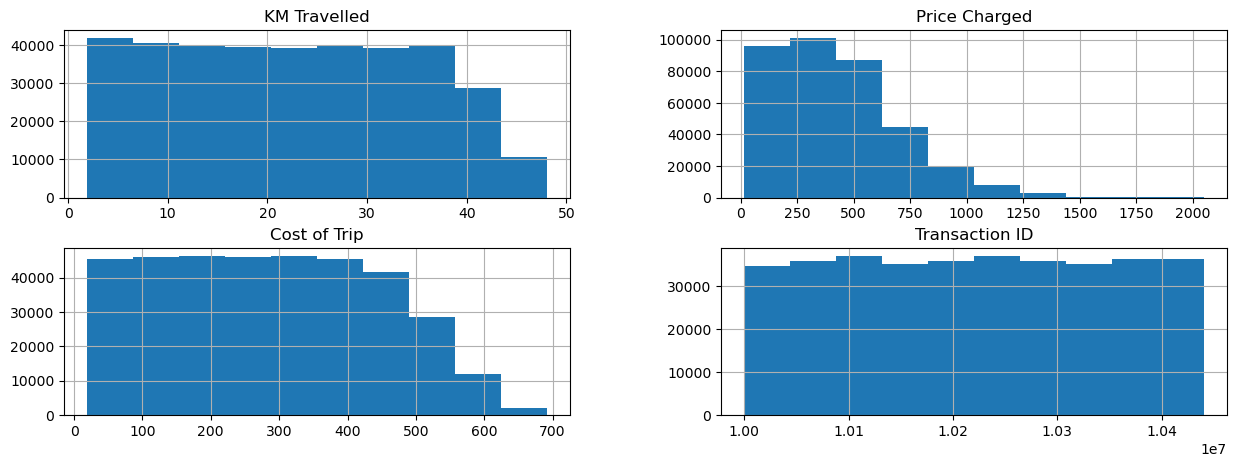

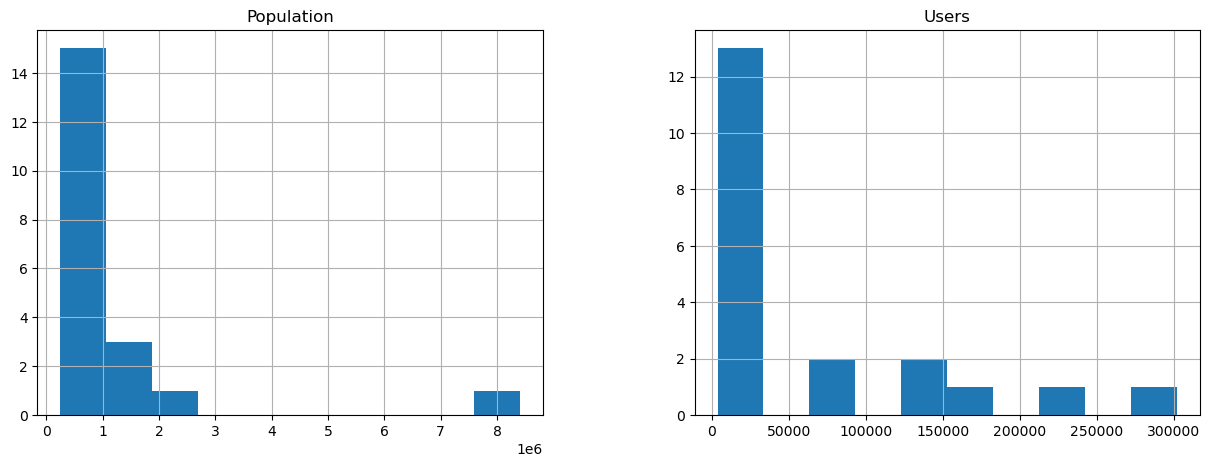

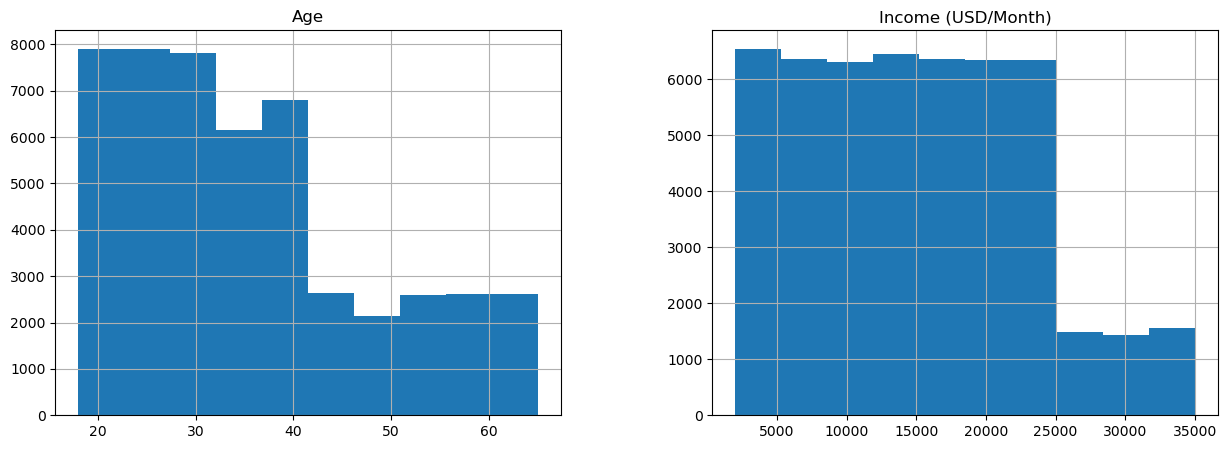

In [189]:
# Function to plot histograms for numerical variables

trips[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Transaction ID']].hist(bins=10, figsize=(15, 5))
plt.show()

city[['Population', 'Users']].hist(bins=10, figsize=(15, 5))
plt.show()

customers[['Age', 'Income (USD/Month)']].hist(bins=10, figsize=(15, 5))
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 2000x2000 with 0 Axes>

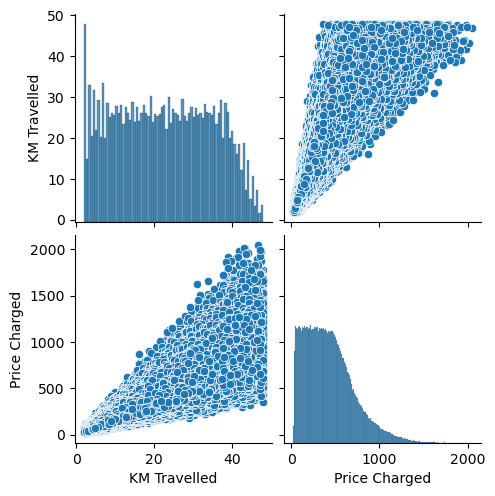

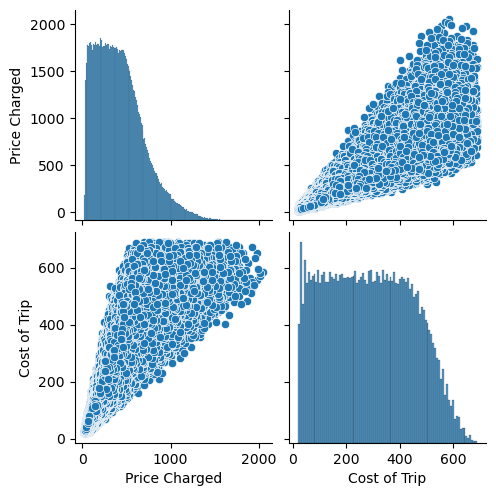

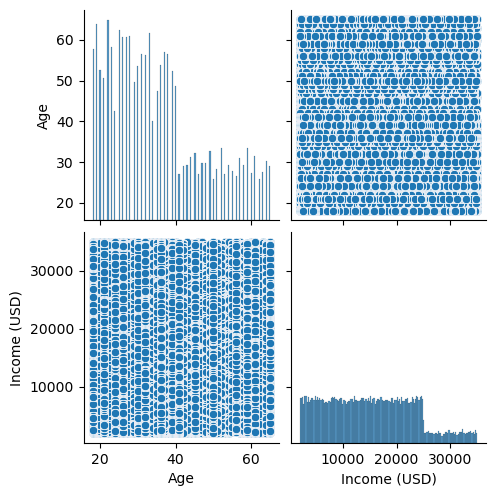

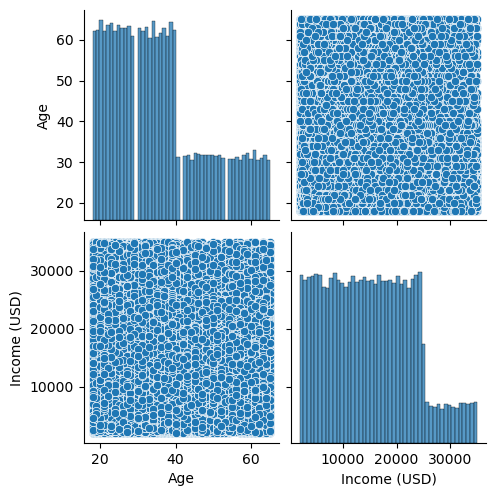

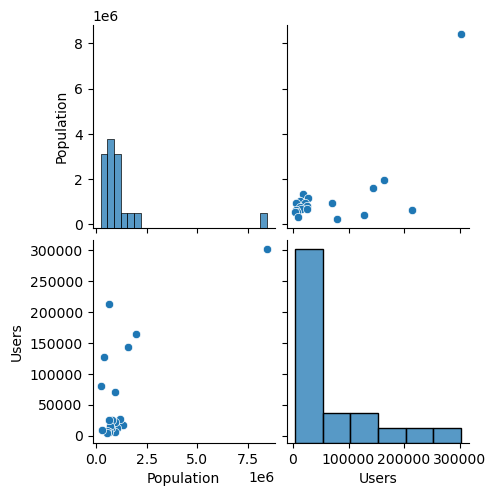

In [190]:
# Bivariate Analysis: how variables are related to each other

# for numerical, pair plots and scatter plots 
# for catetgorical, stacked bar chart is nice. Bar plots if output variable is continuous

plt.figure(figsize=(20,20))

cost_per_km = trips.drop(['Transaction ID', 'Cost of Trip', 'Date of Travel'], axis=1)
sns.pairplot(cost_per_km)

tax = trips.drop(['Transaction ID', 'Date of Travel', 'KM Travelled'], axis=1)
sns.pairplot(tax)

wealth = pd.merge(customers, transactions, left_on='Age', right_on='Customer ID').drop(columns=['Transaction ID', 'Income (USD/Month)', 'Customer ID_y', 'Customer ID_x'])
wealth.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
sns.pairplot(wealth)

age_income = customers.drop(['Customer ID', 'Income (USD/Month)'], axis=1)
sns.pairplot(age_income)

percentages = city.drop(['City'], axis=1)
sns.pairplot(percentages)
plt.show()

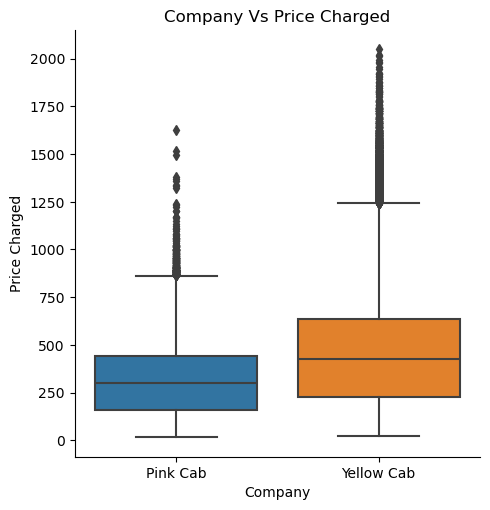

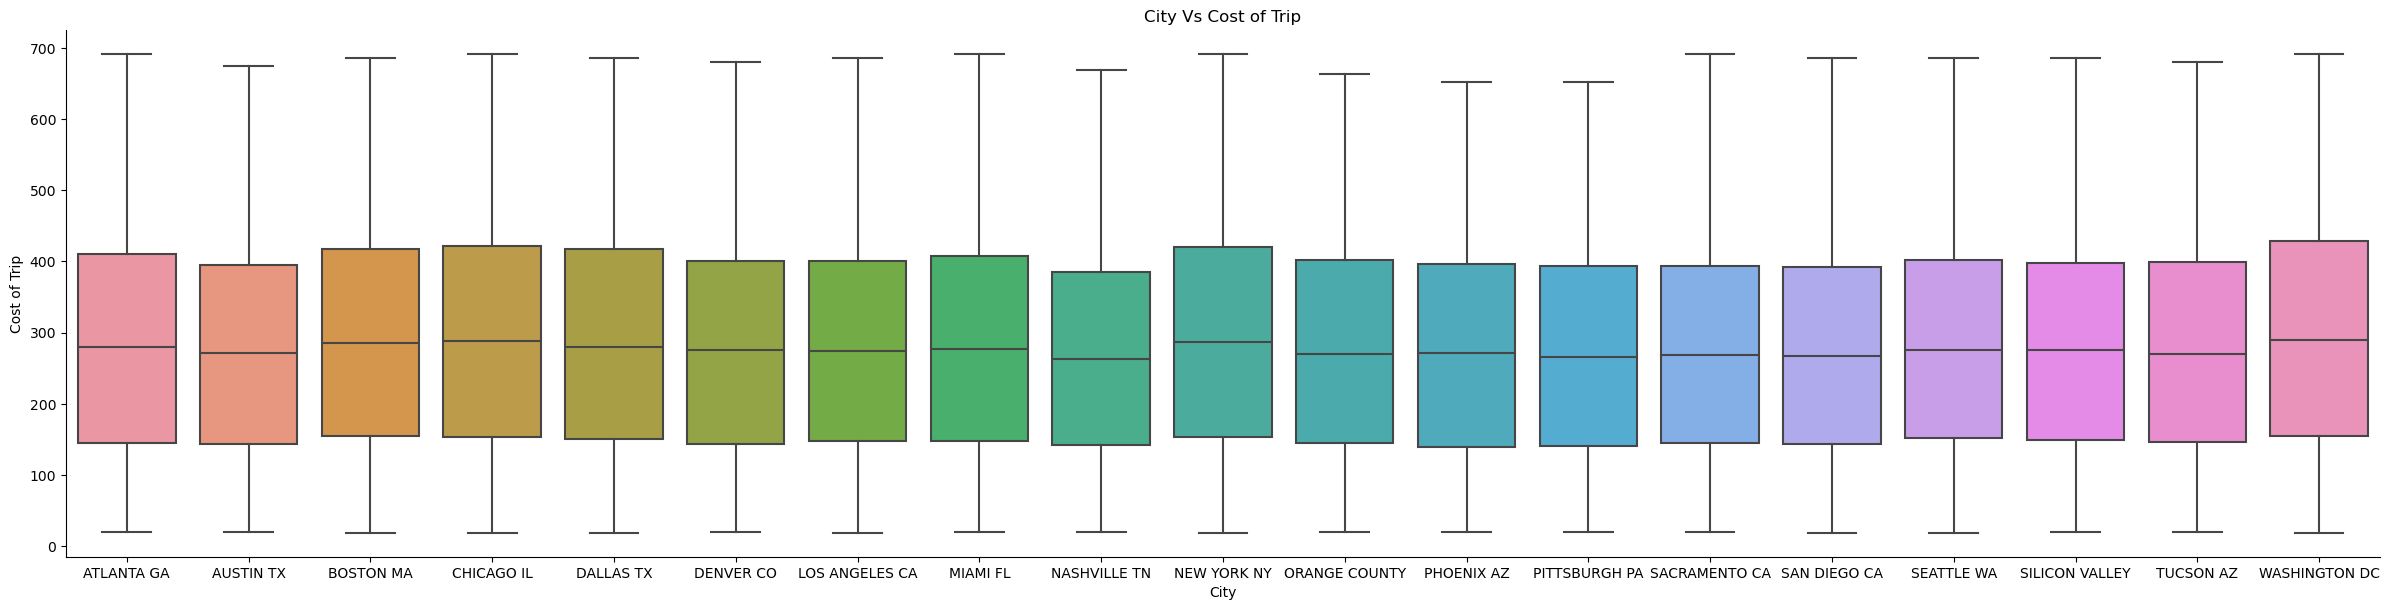

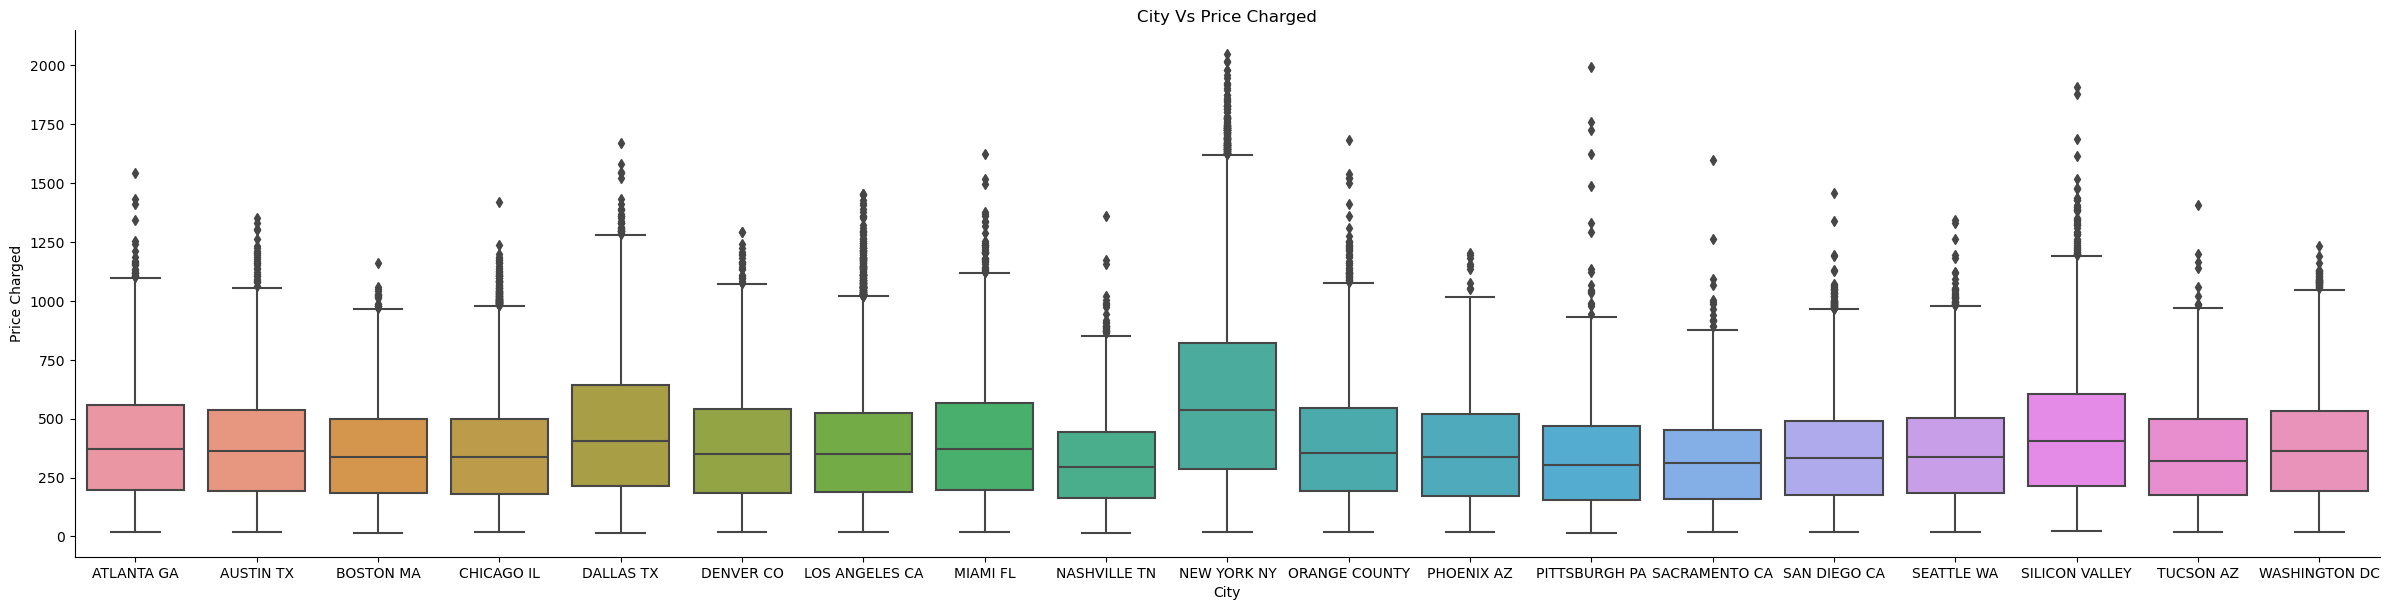

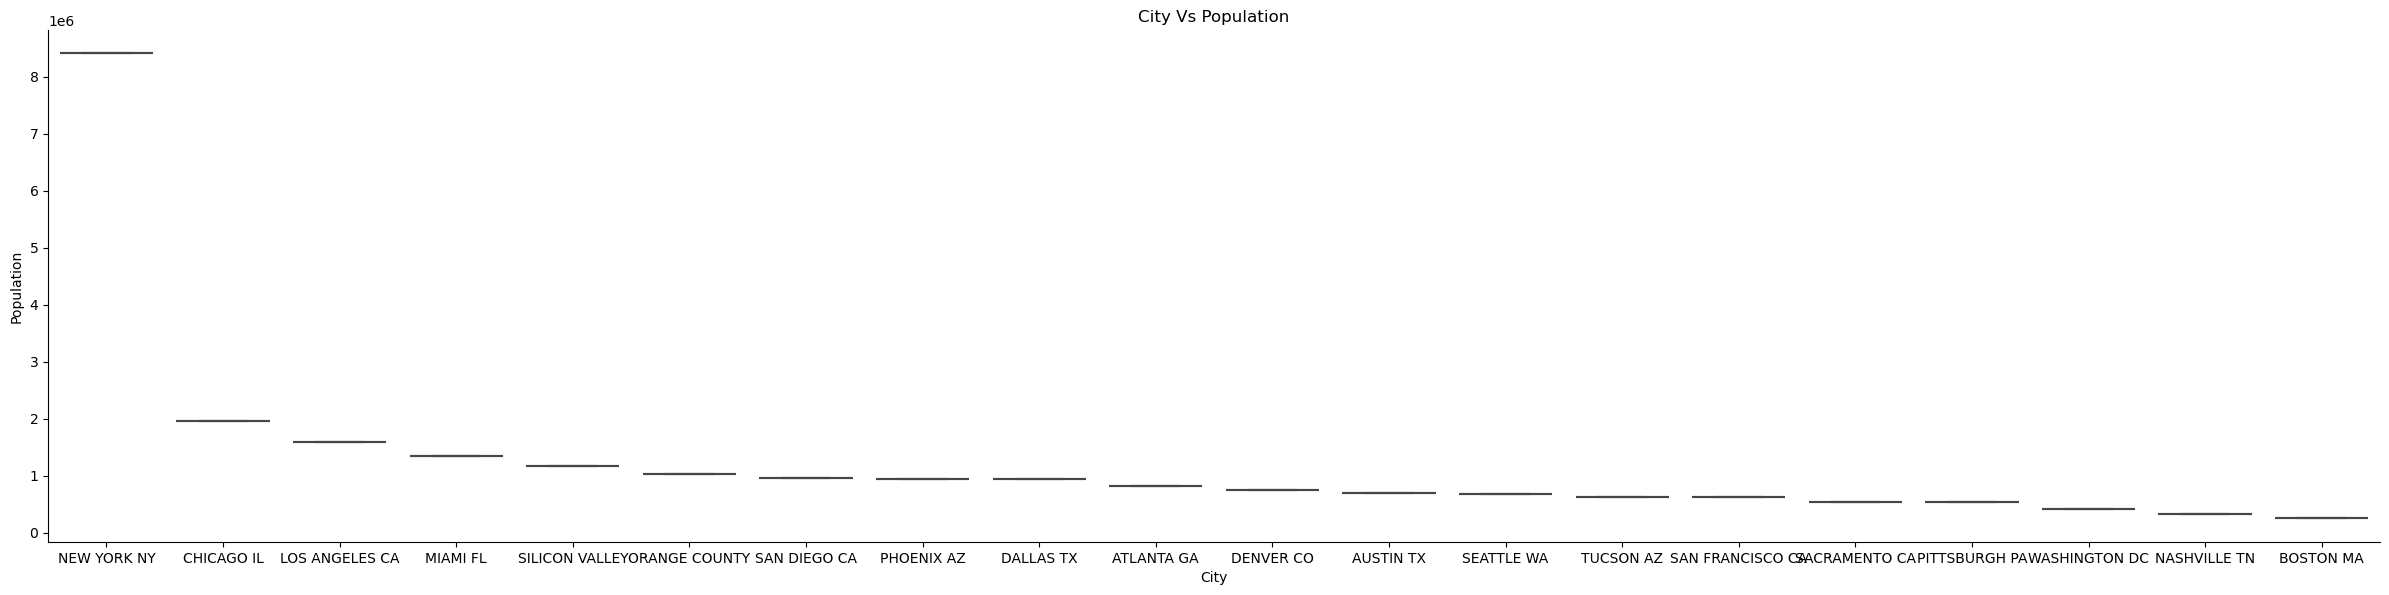

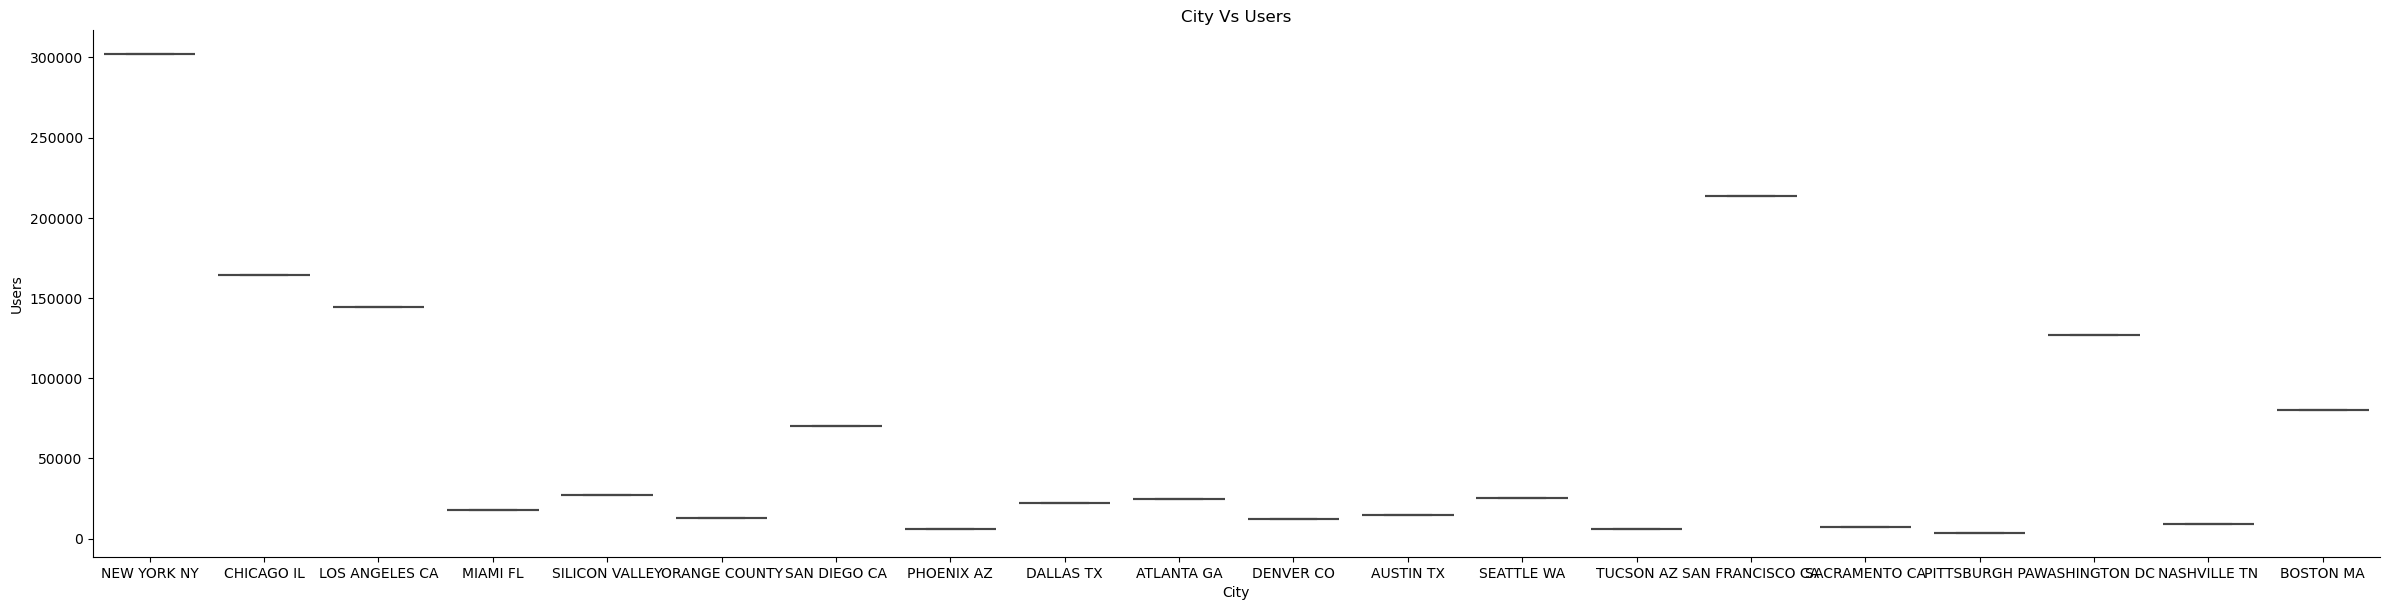

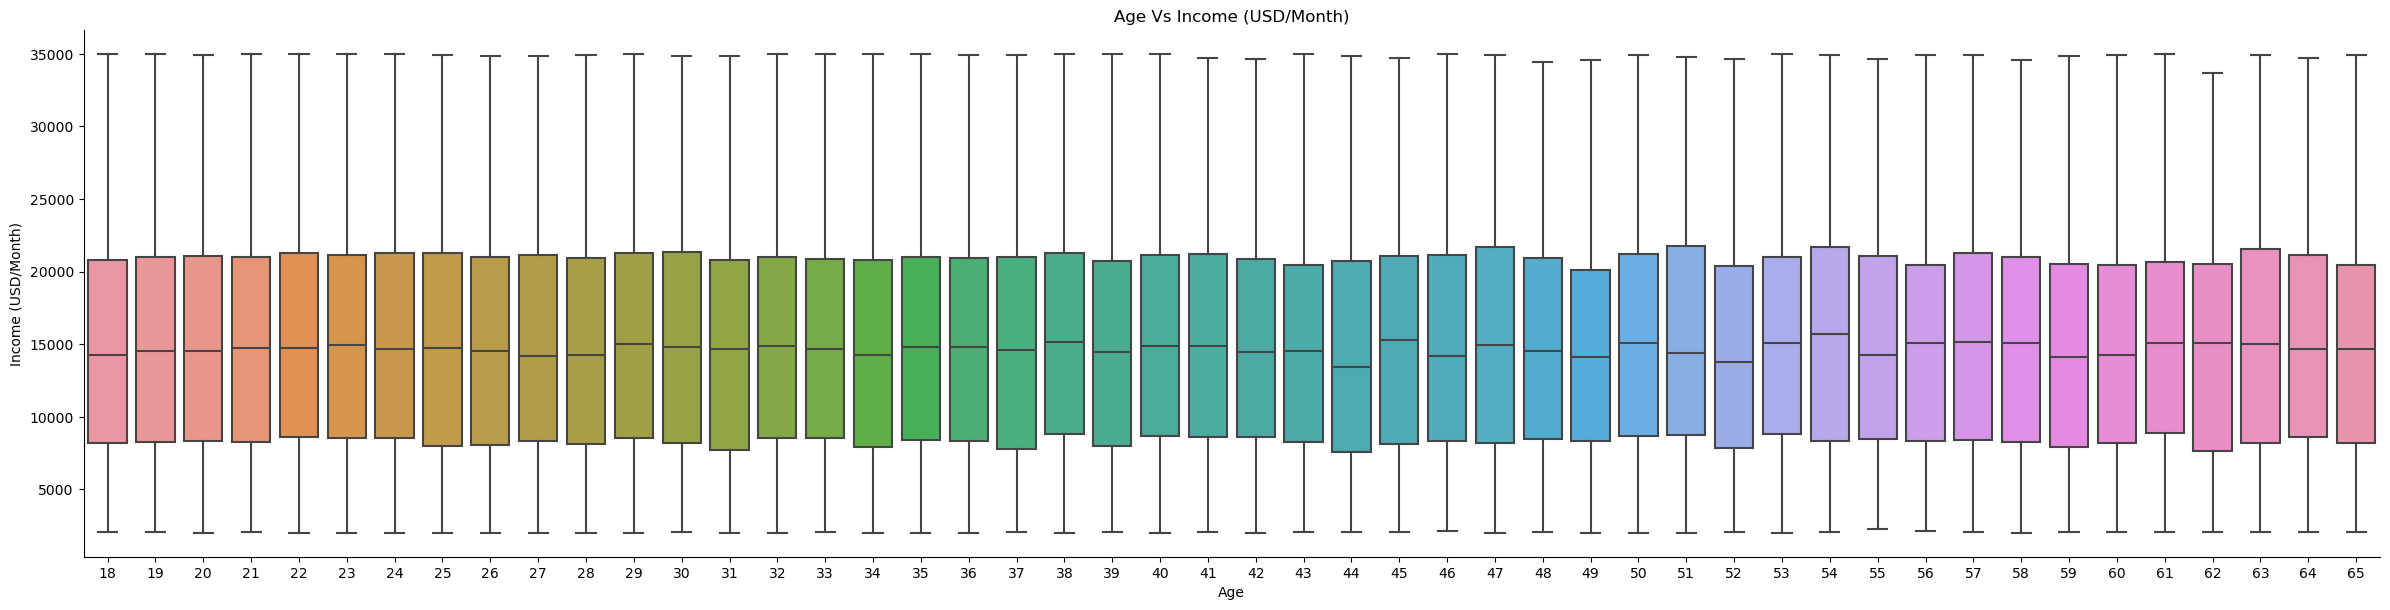

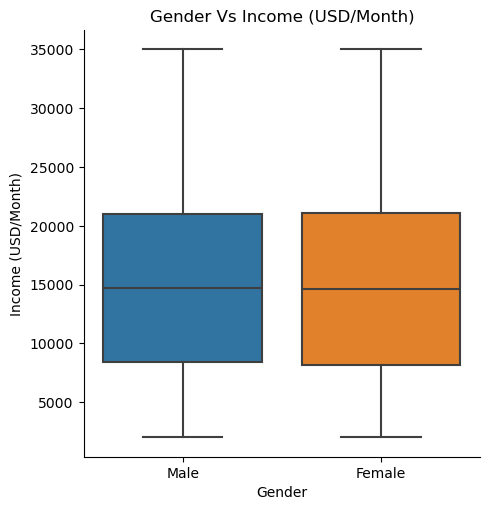

In [191]:
# Bivariate Analysis for Categorical variables; box plot

sns.catplot(data=trips, x='Company', y='Price Charged', kind='box').set(title='Company Vs Price Charged')

sns.catplot(data=trips, x='City', y='Cost of Trip', kind='box', height=6, aspect=4).set(title='City Vs Cost of Trip')

sns.catplot(data=trips, x='City', y='Price Charged', kind='box', height=6, aspect=4).set(title='City Vs Price Charged')

sns.catplot(data=city, x='City', y='Population', kind='box', height=6, aspect=4).set(title='City Vs Population')

sns.catplot(data=city, x='City', y='Users', kind='box', height=6, aspect=4).set(title='City Vs Users')

sns.catplot(data=customers, x='Age', y='Income (USD/Month)', kind='box', height=6, aspect=4).set(title='Age Vs Income (USD/Month)')

sns.catplot(data=customers, x='Gender', y='Income (USD/Month)', kind='box').set(title='Gender Vs Income (USD/Month)')

plt.show()

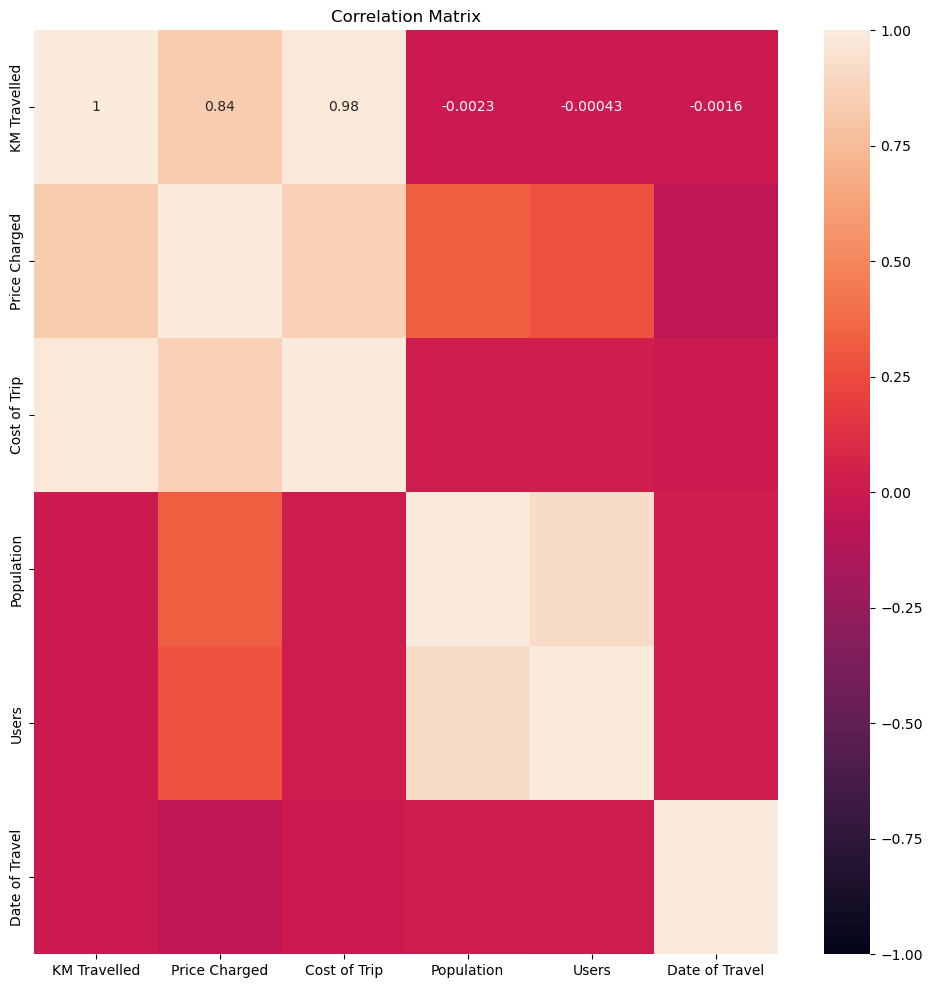

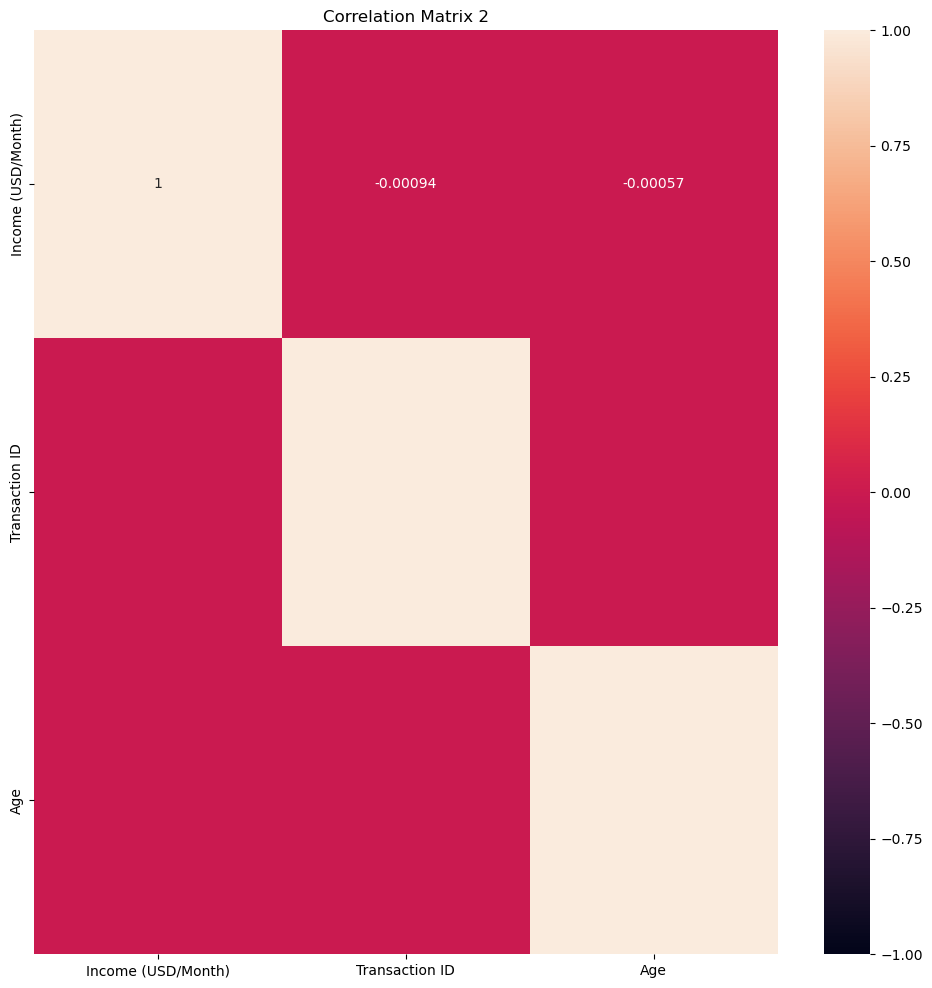

In [192]:
#Multivariate Analysis, making a heatmap to show correlation between variables. Want to merge the datasets first

dfs = [trips, city, customers, transactions]

corr1 = pd.merge(trips, city, on='City')
plt.figure(figsize=(12, 12))
trips_corr = corr1[['KM Travelled', 'Price Charged', 'Cost of Trip','Population', 'Users', 'Date of Travel']].corr()
sns.heatmap(trips_corr, annot=True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix')

corr2 = pd.merge(customers, transactions, on='Customer ID')
plt.figure(figsize=(12, 12))
cust_corr = corr2[['Income (USD/Month)', 'Transaction ID', 'Age']].corr()
sns.heatmap(cust_corr, annot=True, vmin = -1, vmax = 1)
plt.title('Correlation Matrix 2')
plt.show()

In [193]:
# Now we can start diving into Company-Wise descriptive statistics to help makes inferences about our investment strategy 

# Merge data
merged_data = transactions.merge(customers, on='Customer ID').merge(trips, on='Transaction ID')

# Company-wise Descriptive Statistics
company_stats = merged_data.groupby('Company').agg({
    'Transaction ID': 'count',
    'KM Travelled': 'mean',
    'Price Charged': 'mean',
    'Cost of Trip': 'mean'
}).rename(columns={ 'Transaction ID': 'Number of Trips', 'KM Travelled': 'Avg KM Travelled', 'Price Charged': 'Avg Price Charged', 'Cost of Trip': 'Avg Cost of Trip'})
company_stats['Profit per Trip'] = (company_stats['Avg Price Charged'] - company_stats['Avg Cost of Trip'])
print(company_stats)   # We will continue to reference/utilize this information throughout our analysis.  

            Number of Trips  Avg KM Travelled  Avg Price Charged  \
Company                                                            
Pink Cab              84711         22.559917         310.800856   
Yellow Cab           274681         22.569517         458.181990   

            Avg Cost of Trip  Profit per Trip  
Company                                        
Pink Cab          248.148682        62.652174  
Yellow Cab        297.922004       160.259986  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


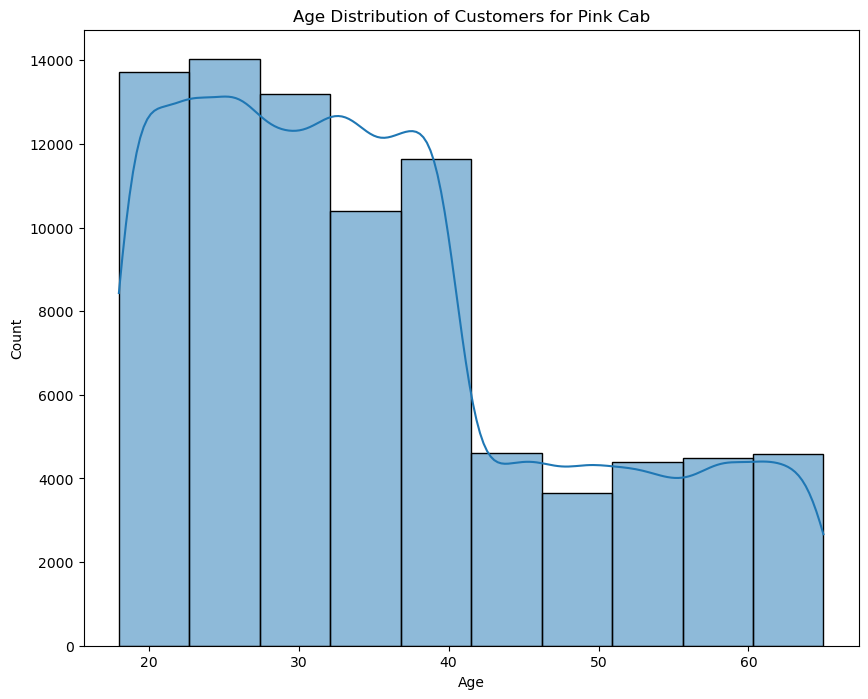

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


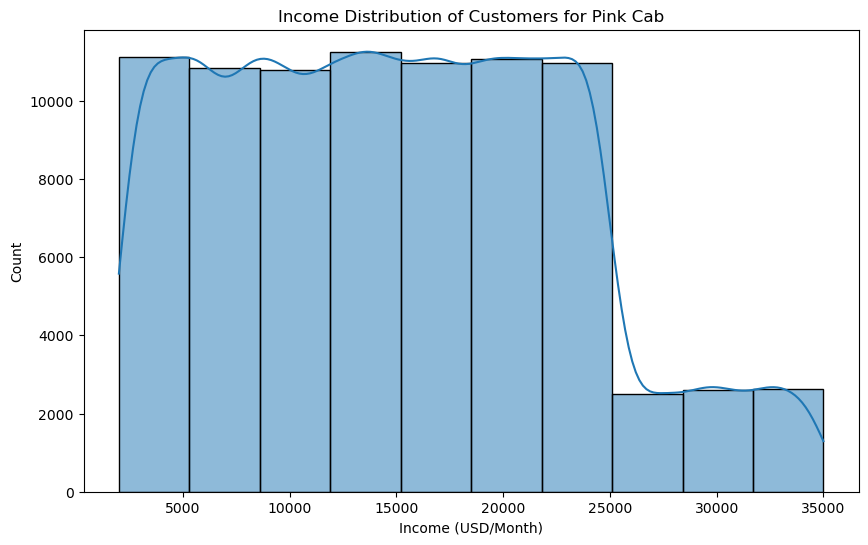

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


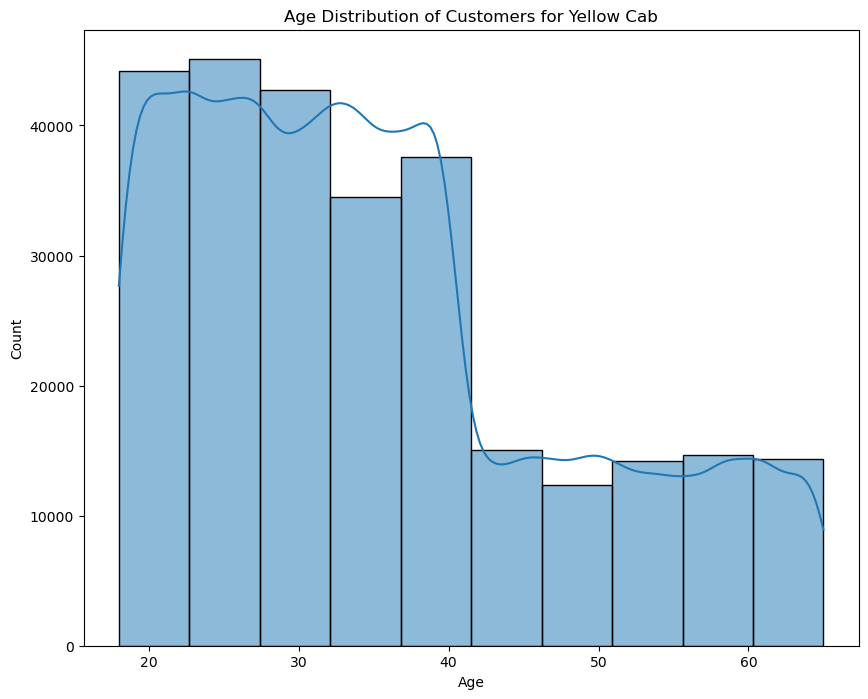

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


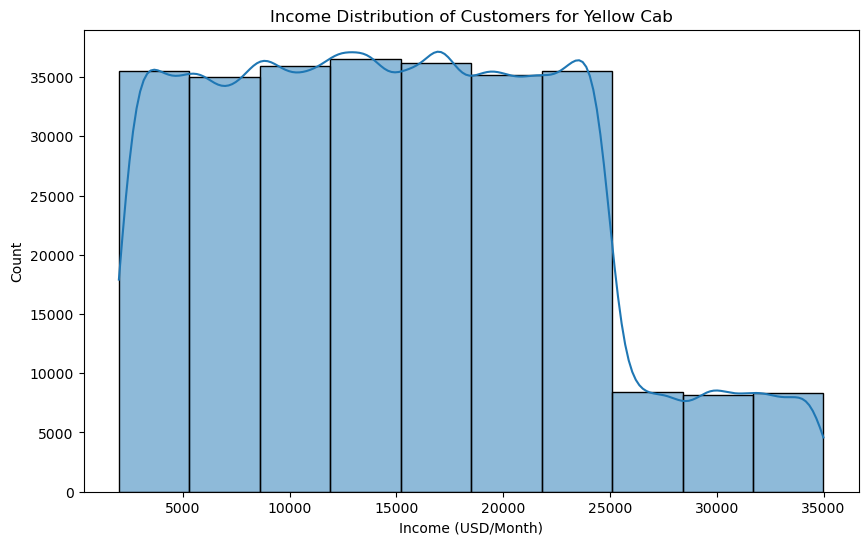

In [194]:
# We can also look into Customer Demographics for each company. This can help us understand accessibility, diversity, and inclusivity.

for company in merged_data['Company'].unique():
    company_data = merged_data[merged_data['Company'] == company]
    plt.figure(figsize=(10, 8))
    sns.histplot(company_data['Age'], bins=10, kde=True)
    plt.title(f'Age Distribution of Customers for {company}')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(company_data['Income (USD/Month)'], bins=10, kde=True)
    plt.title(f'Income Distribution of Customers for {company}')
    plt.show()

Payment_Mode    Card    Cash
Company                     
Pink Cab       50719   33992
Yellow Cab    164785  109896


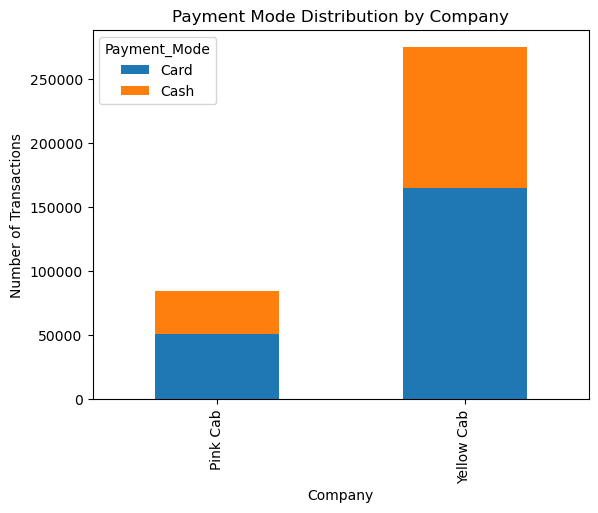

In [195]:
# Let's do a Payment Mode Analysis to further analyze customer demographics for each Cab company
payment_mode_stats = merged_data.groupby(['Company', 'Payment_Mode']).size().unstack().fillna(0)
print(payment_mode_stats)

# Visualization
payment_mode_stats.plot(kind='bar', stacked=True)
plt.title('Payment Mode Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Number of Transactions')
plt.show()

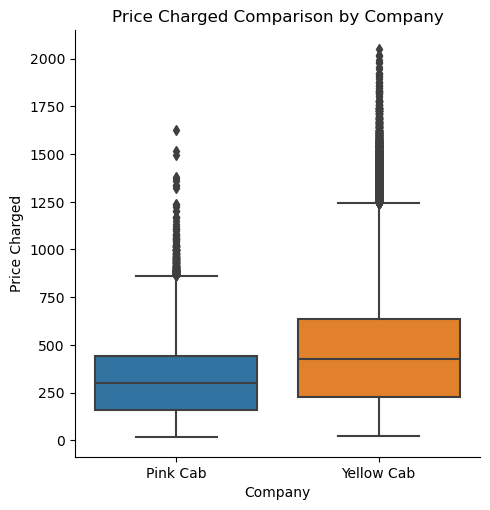

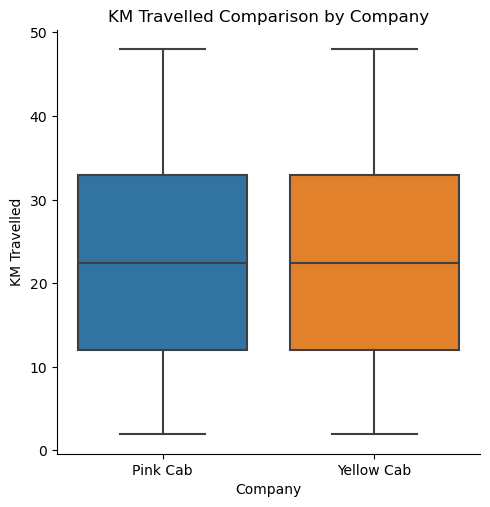

In [196]:
# Analyze Cab company's different Pricing and KM Travelled
sns.catplot(x='Company', y='Price Charged', kind='box', data=merged_data)
plt.title('Price Charged Comparison by Company')
plt.show()

sns.catplot(x='Company', y='KM Travelled', kind='box', data=merged_data)
plt.title('KM Travelled Comparison by Company')
plt.show()

0     62.652174
1    160.259986
Name: Profit per Trip, dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


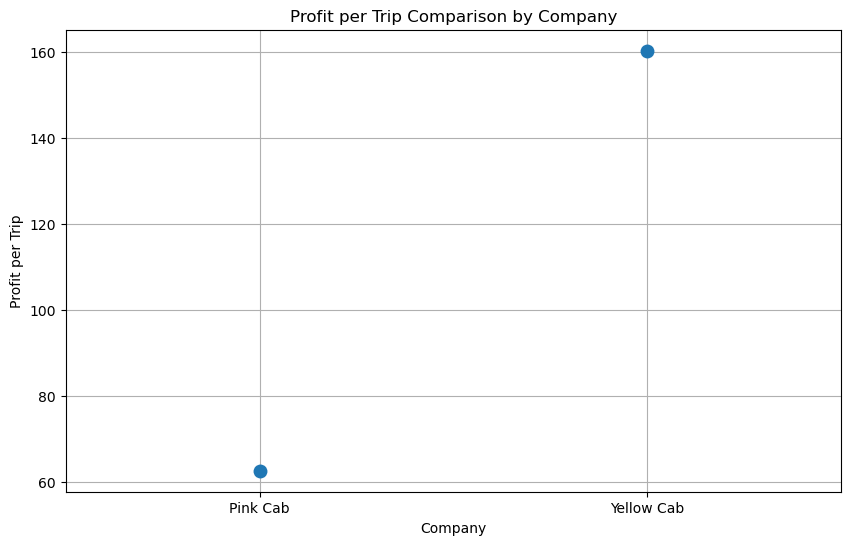

In [197]:
# Let's analyze which company is more profitable based on our Company-Wise Descriptive stats/code from above:

# Profit per Trip Comparison by Company
company_stats.reset_index(inplace=True)
print(company_stats['Profit per Trip'])
plt.figure(figsize=(10, 6))
sns.stripplot(x='Company', y='Profit per Trip', data=company_stats, size=10)
plt.title('Profit per Trip Comparison by Company')
plt.grid(True)

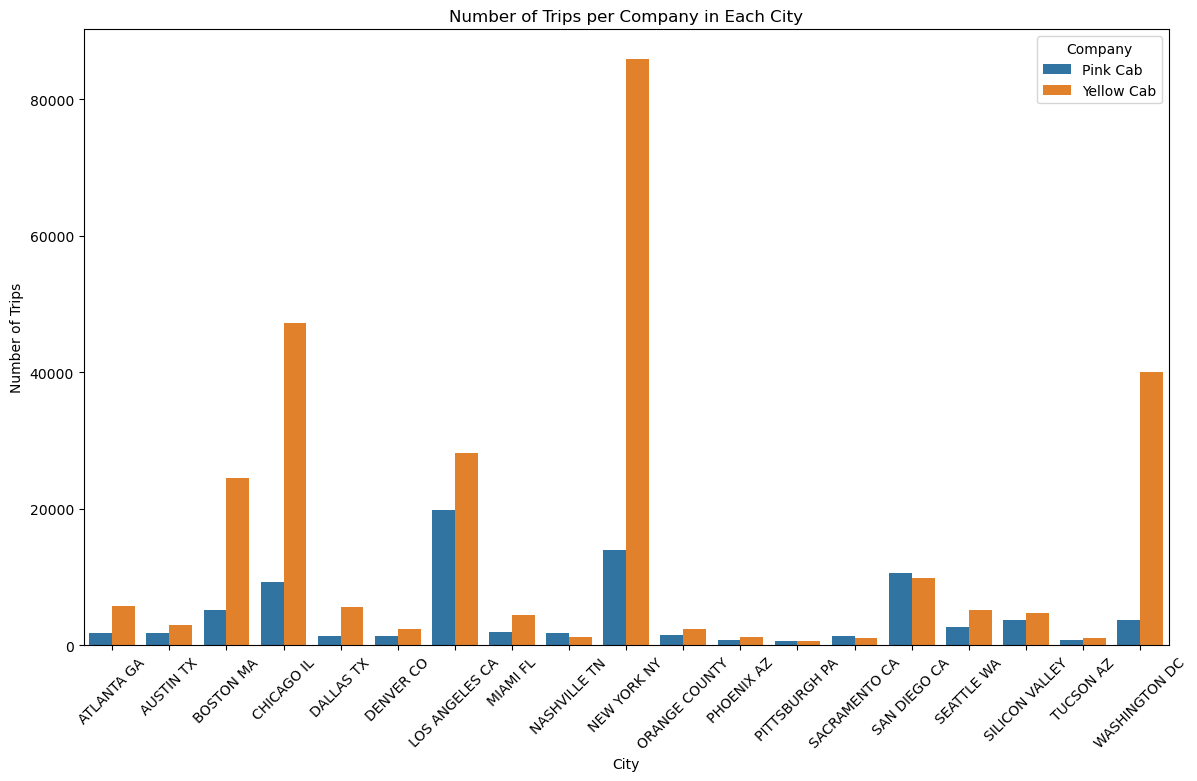

In [198]:
# Lastly, lets gather data about how the city each company operates in affects their operations

merged_data2 = transactions.merge(trips, on='Transaction ID')

# Group by City and Company to count trips
city_company_counts = merged_data2.groupby(['City', 'Company']).size().reset_index(name='Number of Trips')

# Plot the number of trips per company in each city
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Number of Trips', hue='Company', data=city_company_counts)
plt.title('Number of Trips per Company in Each City')
plt.xlabel('City')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

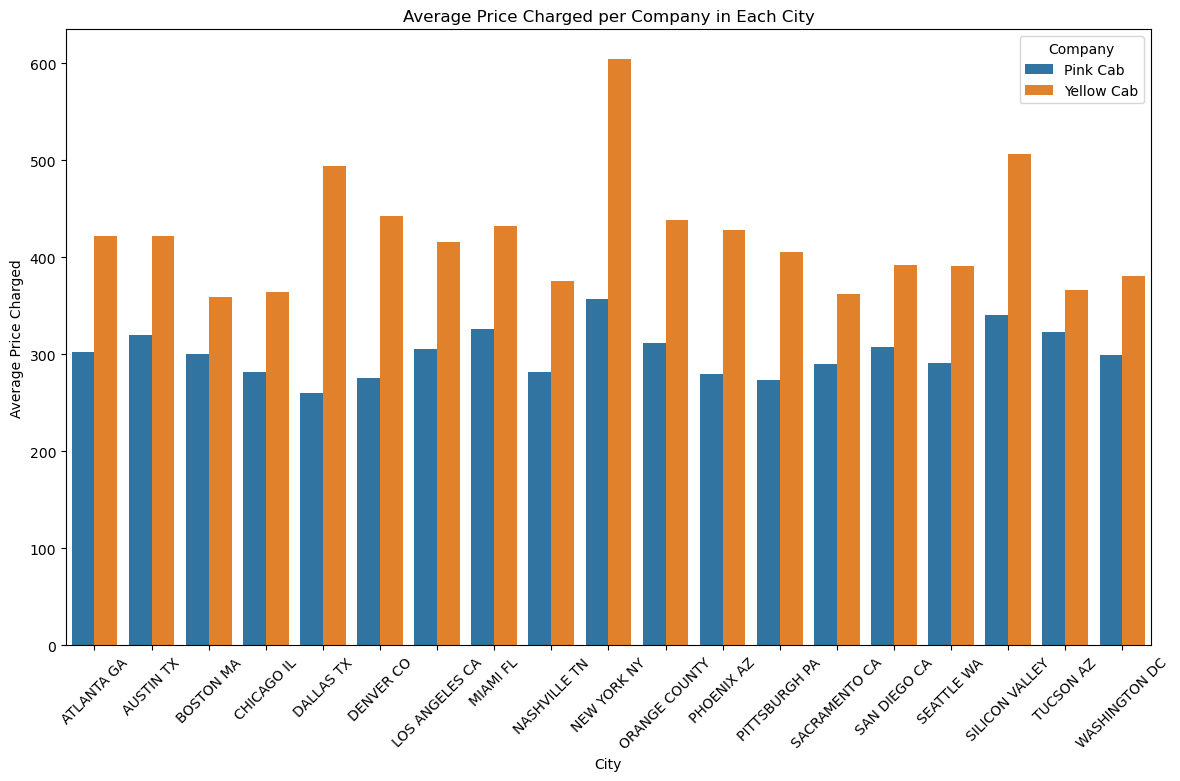

In [199]:
# Group by City and Company to calculate average price charged
city_company_price = merged_data2.groupby(['City', 'Company'])['Price Charged'].mean().reset_index()

# Plot the average price charged per company in each city
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Price Charged', hue='Company', data=city_company_price)
plt.title('Average Price Charged per Company in Each City')
plt.xlabel('City')
plt.ylabel('Average Price Charged')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

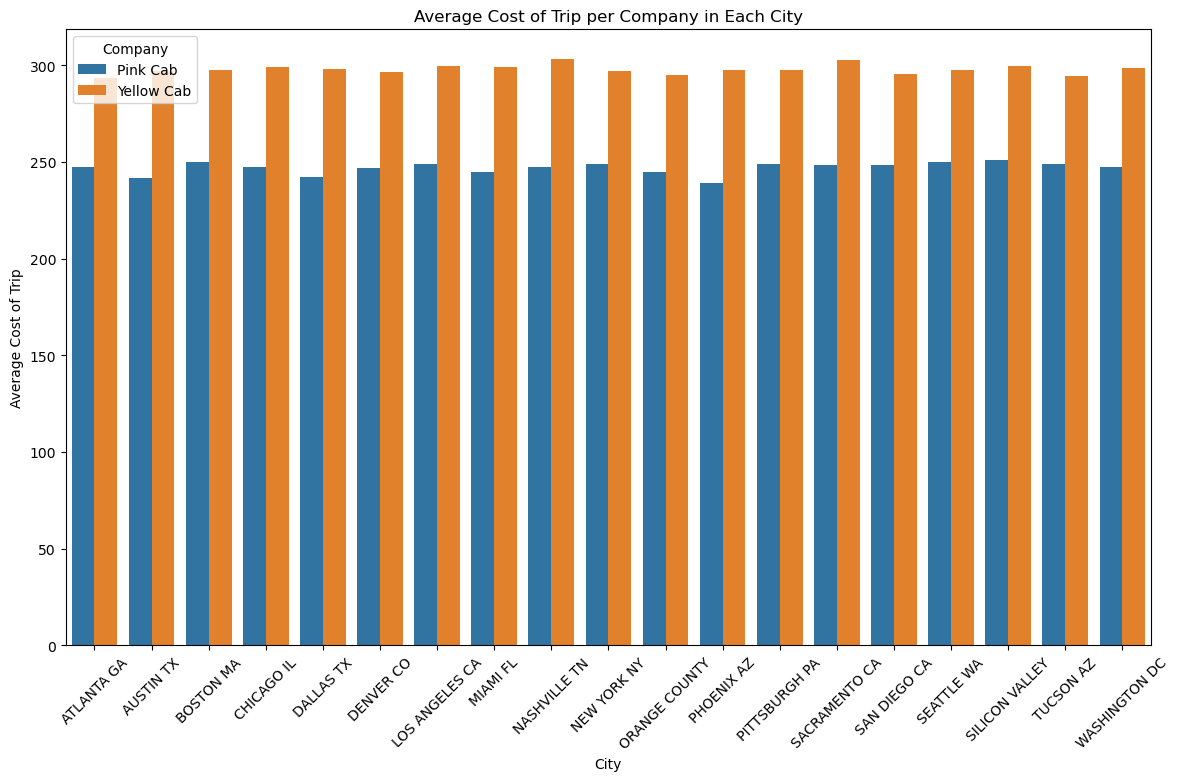

In [200]:
# Group by City and Company to calculate average cost of trip
city_company_cost = merged_data2.groupby(['City', 'Company'])['Cost of Trip'].mean().reset_index()

# Plot the average cost of trip per company in each city
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Cost of Trip', hue='Company', data=city_company_cost)
plt.title('Average Cost of Trip per Company in Each City')
plt.xlabel('City')
plt.ylabel('Average Cost of Trip')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()


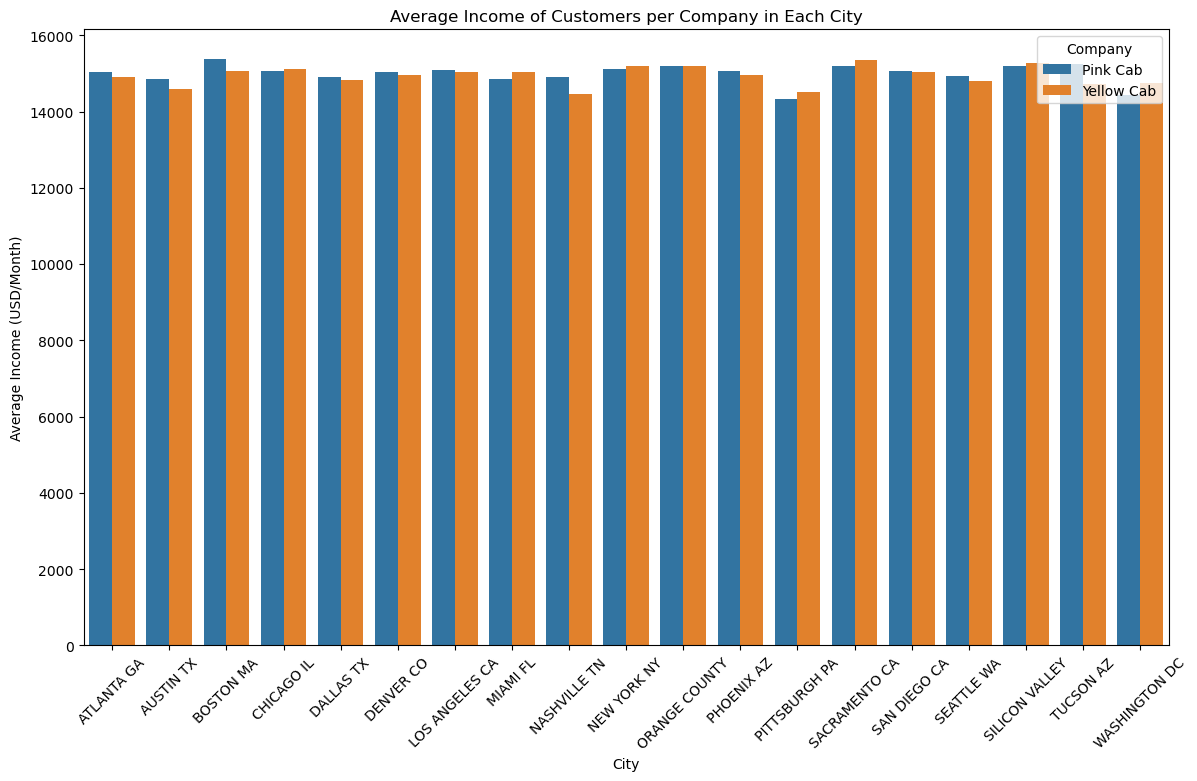

In [201]:
# Group by Company and City to calculate average income of customers
company_income = merged_data.groupby(['Company', 'City'])['Income (USD/Month)'].mean().reset_index()

# Plot the average income of customers per company in each city
plt.figure(figsize=(14, 8))
sns.barplot(x='City', y='Income (USD/Month)', hue='Company', data=company_income)
plt.title('Average Income of Customers per Company in Each City')
plt.xlabel('City')
plt.ylabel('Average Income (USD/Month)')
plt.xticks(rotation=45) 
plt.legend(title='Company')
plt.show()

In [202]:
'''

EDA Recommendations: 

 - based on the findings of this EDA, we can suggest further research into the following areas:

    1. Company-wise Analysis: The data shows that the companies have different average costs and prices charged. Further analysis can be done to understand the reasons behind these differences.
    2. Customer Demographics: The data shows that the age and income distribution of customers varies by company. Further analysis can be done to understand the customer base of each company.
    3. Payment Mode Analysis: The data shows that the payment mode distribution varies by company. Further analysis can be done to understand the payment preferences of customers.
    4. Profit per Trip: The data shows that the profit per trip varies by company. Further analysis can be done to understand the factors that contribute to the profitability of each company.
    5. Operational Efficiency: The data shows that the KM travelled varies by company. Further analysis can be done to understand the operational efficiency of each company.
    6. Location Bias: The data shows that the number of trips varies by city. Further analysis can be done to understand which taxi company is more popular in each city, and how that influences operational costs, pricing, and profitability.
    7. Customer Satisfaction: The data shows that the price charged varies by company. Further analysis can be done to understand customer satisfaction levels and how they are influenced by pricing. (How do taxes or tip expectation factor into Avg Price Charged?)
    8. Customer Loyalty: The data shows that the number of trips varies by city. Further analysis can be done to understand customer loyalty and how it varies by city and company.
    9. Market Share: The data shows that the number of trips varies by city. Further analysis can be done to understand the market share of each company in each city.
    10. Seasonality trends: The data shows that the number of trips varies by date. Further analysis can be done to understand seasonality trends and how they influence the number of trips.

'''

'\n\nEDA Recommendations: \n\n - based on the findings of this EDA, we can suggest further research into the following areas:\n\n    1. Company-wise Analysis: The data shows that the companies have different average costs and prices charged. Further analysis can be done to understand the reasons behind these differences.\n    2. Customer Demographics: The data shows that the age and income distribution of customers varies by company. Further analysis can be done to understand the customer base of each company.\n    3. Payment Mode Analysis: The data shows that the payment mode distribution varies by company. Further analysis can be done to understand the payment preferences of customers.\n    4. Profit per Trip: The data shows that the profit per trip varies by company. Further analysis can be done to understand the factors that contribute to the profitability of each company.\n    5. Operational Efficiency: The data shows that the KM travelled varies by company. Further analysis can b

In [203]:
'''

Hypothesis Results: 

1. If Company A has a larger market share than Company B in a "Big City X" (defined as a city taking up more than 50% of the total population of all cities in the dataset), then Company A will have a higher average price charged than Company B in Big City X.
2. If Company A has a larger market share than Company B in a "Big City X", then Company A will have a higher average cost of trip than Company B in Big City X.
3. If Company A has a larger market share than Company B in a "Big City X", then Company A will have a higher average profit per trip than Company B in Big City X.
4. If Company A has a larger market share than Company B in a "Big City X", then Company A will have a higher average income of customers than Company B in Big City X.
5. If Company A has a higher total number of rides, then Company A will be a more inclusive/less discriminatory company.
6. If Company A has a higher average Price Charged, then Company A will have more total transactions, and therefore be a more accessible company. 
7. If Company A has a larger distribution of Payment Modes, then Company A will be a more accessible company.
8. If Company A has a higher average price charged, then Company A will have a higher average KM travelled.
9. If Company A has a higher average cost of trip, then Company A will have a higher average KM travelled.

Other hypthoses worth looking into for the presentation:
- If Company A has a higher average cost of trip, then Company A will have a higher average price charged.
- If Company A has a higher average cost of trip, then Company A will have a higher profit per trip.
- If Company A has a higher average price charged, then Company A will have a higher profit per trip.
- If Company A has a higher average price charged, then Company A will have a higher average income of customers.

'''

'\n\nHypothesis Results: \n\n1. If Company A has a larger market share than Company B in a "Big City X" (defined as a city taking up more than 50% of the total population of all cities in the dataset), then Company A will have a higher average price charged than Company B in Big City X.\n2. If Company A has a larger market share than Company B in a "Big City X", then Company A will have a higher average cost of trip than Company B in Big City X.\n3. If Company A has a larger market share than Company B in a "Big City X", then Company A will have a higher average profit per trip than Company B in Big City X.\n4. If Company A has a larger market share than Company B in a "Big City X", then Company A will have a higher average income of customers than Company B in Big City X.\n5. If Company A has a higher total number of rides, then Company A will be a more inclusive/less discriminatory company.\n6. If Company A has a higher average Price Charged, then Company A will have more total trans